# Lista 4

## Oliwier Kaszyca

##  Zadanie 1

Napisać funkcję obliczającą ilorazy różnicowe.

In [1]:
function ilorazyRoznicowe(x::Vector{Float64}, f::Vector{Float64})
    """ Funkcja obliczająca ilorazy różnicowe dla podanej funkcji i jej wartości
    
    Dane wejściowe:
        x: wektor długości n + 1 zawierający węzły x0, ... , xn (x[1] = x0 itd.)
        f: wektor długości n + 1 zawierający wartości funkcji w podanych węzłach (x)
    
    Dane wyjściowe:
        fx: wektor długości n + 1 zawierający obliczone ilorazy różnicowe, w postaci:
            fx[1] = f[x0]; fx[2] = f[x0, x1] itd.       
    """     
    
    
    n = length(f)
    fx = copy(f)
    
    for i = 2:n
        for j = n:-1:i
            fx[j] = (fx[j] - fx[j-1]) / (x[j] - x[j-i+1])
        end
    end
    return fx
end

ilorazyRoznicowe (generic function with 1 method)

### Opis

Powyższy algorytm to interpretacja następującego wzoru służącego do wyliczania ilorazów róznicowych:
$$f[x_i, x_{i+1}, \dots, x_{i+j}] = \frac{f[x_{i+1}, \dots, x_{i+j} ] - f[x_i, \dots, x_{i+j-1}]}{x_{i+j} - x_i}$$
Zakładając, że $f[x_i] = f(x_i)$ oraz $f[x_i, x_j] = \frac{f(x_j) - f(x_i)}{x_j - x_i}$ w prosty sposób możemy skonstruować tablicę trójkątną, łatwą do reprezentacji graficznej. Analizując jej konstrukcję, można zauważyć, że interesujący nas wynik znajduje się w jej pierwszym rzędzie, więc algorytm nie musi korzystać z macierzy (zgodnie z treścią zadania).  

Na początku, tworzona jest kopia wektora f (fx), która będzie przechowywała ostateczny wynik. Następnie swoje działanie rozpoczynają dwie pętle: zewnętrzna, odpowiedzialna za nawigację między kolejnymi kolumnami tablicy trójkątnej; oraz wewnętrzna, która uzupełnia wartości w kolejnych wierszach każdej kolumny, wędrując od ostatniego wiersza (dzięki czemu nie grozi nam utrata potrzebnych wartości). Z każdą iteracją kolejne kolumny są nadpisywane nowymi wartościami, zgodnie z podanym wcześniej wzorem. Obliczenia są zatem wykonywane bez użycia macierzy.
Bo zakończonych iteracjach, zwracany jest wektor reprezentujący pierwszy rząd tablicy trójkątnej.

### Testy

Dla danych z zadania 4 z listy 4.

In [2]:
xi = [-2.0, -1.0, 0.0, 1.0, 2.0, 3.0]
fxi = [-25.0, 3.0, 1.0, -1.0, 27.0, 235.0]

ilorazyRoznicowe(xi, fxi)

6-element Array{Float64,1}:
 -25.0
  28.0
 -15.0
   5.0
   0.0
   1.0

Wynik zwrócony przez algorytm jest identyczny z tym, który otrzymaliśmy podczas rozwiązywania zadania (również korzystając z tablicy trójkątnej)

## Zadanie 2

Napisać funkcję obliczającą wartość wielomianu interpolacyjnego stopnia n w postaci Newtona $N_n(x)$ w punkcie $x=t$ za pomocą uogólnionego algorytmu Hornera.

In [3]:
function warNewton(x::Vector{Float64}, fx::Vector{Float64}, t::Float64)    
    """ Funkcja obliczająca wartość wielomianu interpolacyjnego w punkcie x = t,
        za pomocą uogólnionego algorytmu Hornera.
        
        Dane wejściowe:
            x: wektor długości n + 1 zawierający węzły x0, ... , xn (x[1] = x0 itd.)
            fx: wektor długości n + 1 zawierający ilorazy różnicowe, w postaci:
                fx[1] = f[x0]; fx[2] = f[x0, x1] itd.
            t: punkt, w którym zostanie obliczona wartość wielomianu (Float64)
    
        Dane wyjściowe:
            nt: wartość wielomianu w punkcie t (Float64)
    
    """ 
    n = length(x)
    nt = fx[n]
    
    for k = n - 1:-1:1
        nt = fx[k] + (t-x[k]) * nt
    end
    
    return nt
    
end

warNewton (generic function with 1 method)

### Opis

Wielomian interpolacyjny Newtona możemy przedstawić następująco:
$$N_n(x) = f[x_0] + f[x_0, x_1](x - x_0) + \dots + f[x_0, x_1, \dots, x_n](x - x_0)(x - x_1) \dots (x - x_{n-1})$$
Taka reprezentacja pozwala na obliczenie wartości tegoż wielomianu, w dowolnym punkcie, za pomocą następujących wzorów (uogólniony algorytm Hornera):

1) $w_n(x) = f[x_0, x_1, \dots , x_n]$

2) $w_k(x) = f[x_0, x_1, \dots , x_k] + (x - x_k)w_{k+1}(x)$, gdzie $k=n-1, \dots, 0$ 

3) $N_n(x) = w_0(x)$



Wzory te są wykorzystane w podanym algorytmie.

Na początku tworzona jest zmienna $nt$, która będzie przechowywała ostateczny wynik. Ponieważ pętla będzie iterowała po elementach fx od końca (k = n-1), wartość zmiennej nt ustawiamy na ostatnią wartość przechowywaną w wektorze fx. Kolejne iteracje pętli to de facto kolejne kroki uogólnionego algorytmu Hornera (w postaci wzoru 2)). Gdy pętla zakończy swoje działanie, zwracany jest wynik, przechowywany przez zmienną nt.    

Koszt wykonania tego algorytmu to $O(n)$ - jedna pętla wykonująca się n-1 razy.

### Testy

Dla danych testowych wykorzystywanych w poprzednim zadaniu: $x_i$ = [-2.0, -1.0, 0.0, 1.0, 2.0, 3.0]
$f_{x_i}$ = [-25.0, 3.0, 1.0, -1.0, 27.0, 235.0]

In [4]:
i = ilorazyRoznicowe(xi, fxi)
warNewton(xi, i, 3.0)

235.0

Zwrócony wynik pokrywa się z wartością $f_{x_3}$

## Zadanie 3

Znając współczynniki wielomianu interpolacyjnego w postaci Newtona (ilorazy różnicowe) oraz węzły, napisać funkcję obliczającą współczynniki jego postaci naturalnej.

In [5]:
function naturalna(x::Vector{Float64}, fx::Vector{Float64})
    """ Funkcja obliczająca współczynniki wielomianu interpolacyjnego w jego postaci naturalnej 
        
        Dane wejściowe:
            x: wektor długości n + 1 zawierający węzły x0, ... , xn (x[1] = x0 itd.)
            fx: wektor długości n + 1 zawierający ilorazy różnicowe, w postaci:
                fx[1] = f[x0]; fx[2] = f[x0, x1] itd.
        
        Dane wyjściowe:
            a: wekotor długości n + 1 zawierający obliczone współczynniki postaci naturalnej, w postaci:
                a[1] = a0; a[2] = a1; a[n+1] = an, gdzie w(x) = anx^n + a(n-1)x^(n-1)+...+a0 itd.
    """ 
    
    n = length(x)
    a = Vector{Float64}(undef, n)
    a[n] = fx[n]
    
    for k = n - 1:-1:1
        a[k] = fx[k] - x[k] * a[k+1]
        for j = (k + 1):(n - 1)
           a[j] = a[j] - x[k] * a[j + 1] 
        end
    end
    return a
end

naturalna (generic function with 1 method)

### Opis

Obliczenie współczynników wielomianu dla jego postaci naturalnej również opiera się na wykorzystaniu wzorów, które podałem w poprzednim zadaniu. Sama konstrukcja algorytmu jest bardzo podobna, z wyjątkiem paru istotnych różnic, które objaśnię poniżej.

Na początku działania, tworzony jest wektor a, który będzie przechowywał obliczone współczynniki. Analogicznie jak w zadaniu 2., obliczenia będą wykonywane "od końca", dlatego $a[n] = fx[n]$. Następnie pojawiają się dwie pętle, pierwsza, podobnie jak w zadaniu 2., oblicza "składowe" wielomiany (zgodnie z podanymi wzorami), jednak tym razem są one osobno zapisywane w wektorze a. Pętla wewnętrzna ma za zadanie doprowadzić utworzony w pętli zewnętrznej, "składowy" wielomian do postaci naturalnej. Kiedy pętla zakończy działanie (przeiteruje po każdym elemencie fx), zostaje zwrócony wektor a, ze współczynnikami dla postaci naturalnej wielomianu interpolacyjnego.

Koszt wykonania tego algorytmu to $O(n^2)$ - pętla zewnętrzna wykonuje się $n-1$ razy, a pętla wewnętrzna co najwyżej $n$ razy. W przypdaku pesymistycznym mamy zatem: $O(n * (n - 1)) = O(n^2)$

### Testy

Dla danych testowych wykorzystywanych w poprzednim zadaniu: $x_i$ = [-2.0, -1.0, 0.0, 1.0, 2.0, 3.0]
$f_{x_i}$ = [-25.0, 3.0, 1.0, -1.0, 27.0, 235.0]

In [6]:
il = ilorazyRoznicowe(xi, fxi)
naturalna(xi, i)

6-element Array{Float64,1}:
  1.0
 -3.0
  0.0
  0.0
  0.0
  1.0

Postać naturalna sprawdzanego wielomianu ( -25 + 28(x+2)-15(x+2)(x+1) + 5(x+2)(x+1)x + (x+2)(x+1)x(x-1)(x-2) ) to
$x^5 - 3x + 1$, czyli zgodnie ze specyfikacją tego zadania: [1, -3, 0, 0, 0, 1]. Wynik zwrócony przez algorytm jest zatem poprawny. 

## Zadanie 4

Napisać funkcję, która zinterpoluje zadaną funkcję f(x) w przedziale [a, b] za pomocą wielomianu interpolacyjnego stopnia n w postaci Newtona. Następnie narysuj wielomian interpolacyjny i interpolowaną funkcję. 

In [7]:
using Plots

function rysujNnfx(f, a::Float64, b::Float64, n::Int)
    """ Funkcja przeprowadzająca interpolację podanej funkcji w podanym przedziale oraz
        rysująca podaną funkcję i jej wielomian interpolacyjny.
    
        Dane wejściowe:
            f: funkcja zadana jako anonimowa
            a,b: przedział interpolacji
            n: stopień wielomianu interpolacyjnego
    
        Dane wyjściowe:
            BRAK: funkcja rysuje funkcję oraz wielomian interpolacyjny
    """
    
    accuracy = 20
    n_max = n + 1 
    
    x = Vector{Float64}(undef, n_max)
    y = Vector{Float64}(undef, n_max)
    f_x = Vector{Float64}(undef, n_max) 
    
    plot_x = Vector{Float64}(undef, n_max*accuracy) 
    plot_y = Vector{Float64}(undef, n_max*accuracy) 
    plot_ip = Vector{Float64}(undef, n_max*accuracy) 
    
    
    h = (b - a) / n
    kh = Float64(0.0)


    for i = 1:n_max
        x[i] = a + kh
        y[i] = f(x[i])
        kh += h
    end
    
    f_x = ilorazyRoznicowe(x, y)
    
    kh = Float64(0.0)
    n_max *= accuracy
    h = (b - a) / (n_max - 1)

    for i = 1:n_max
        plot_x[i] = a + kh
        plot_y[i] = f(plot_x[i])
        plot_ip[i] = warNewton(x, f_x, plot_x[i])
        kh += h
    end

    title = "Interpolacja dla n = " * string(n)
    plot(plot_x, [plot_y, plot_ip], label=["f(x)" "w(x)"], lw=2, title=title)

end



rysujNnfx (generic function with 1 method)

### Opis

Wykonanie interpolacji funkcji opiera się na algorytmach, które zostały zaimplementowane wcześniej (ilorazy różnicowe (zad1), obliczanie wartości wielomianu w punkcie w postaci Newtona (zad2)). Elementem w algorytmie, który został dodany to wyznaczenie równoodległych od siebie węzłów, które wykonywane jest w pierwszej pętli. Wiąże się to z następującymi wzorami: $x_k = a + kh,  h = \frac{b - a}{n}$ dla $k = 0, 1, \dots, n$. 

Na początku ustalana jest dokładność rysowanych wykresów (mnożnik accuracy, który zwiększa liczbę węzłów, na których zostanie wywałana funkcja warNewton. Po zdefiniowaniu potrzebnych zmiennych i wektorów, wyznaczane są węzły: ustalana jest odległość h oraz inicjalizowany współczynnik $kh$. Następnie w pętli obliczane jest $n_{max}$ węzłów oraz wartości podanej funkcji (f), w tych węzłach. Tak przygotowane dane są przekazywane do funkcji ilorazyRoznicowe. W kolejnym kroku, będą liczone wartości wielomianu interpolacyjnego, za pomocą funkcji warNewton. Przed wykonaniem pętli, wykonującej to zadanie, ponownie wyznaczane są węzły (tym razem będzie ich więcej, tak żeby wykres funkcji był dokładniejszy). Otrzymane w ten sposób dane (plot_x, plot_y oraz wartości po przeprowadzonej interpolacji - plot_ip) przedstawiane są na wykresie.

### Testy

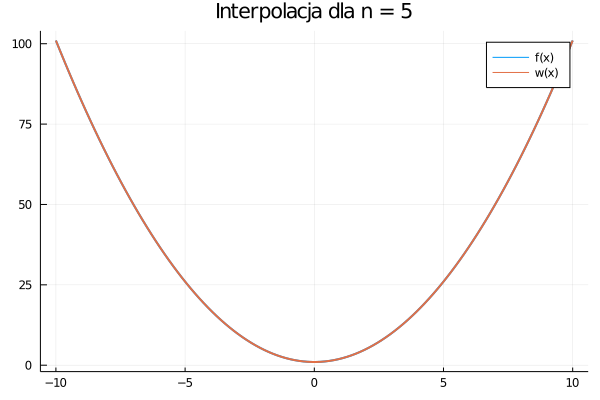

In [8]:
rysujNnfx(x->x^2 + 1, -10.0, 10.0, 5)

Dla funkcji $x^2 + 1$ wielomian interpolacyjny pokrywa się z wykresem funkcji. Algorytm działa.

## Zadanie 5

Przetestować funkcję $rysujNnfx(f,a,b,n)$ na następujących przykładach:

#### a) $e^x$ dla [0,1], n= 5, 10, 15

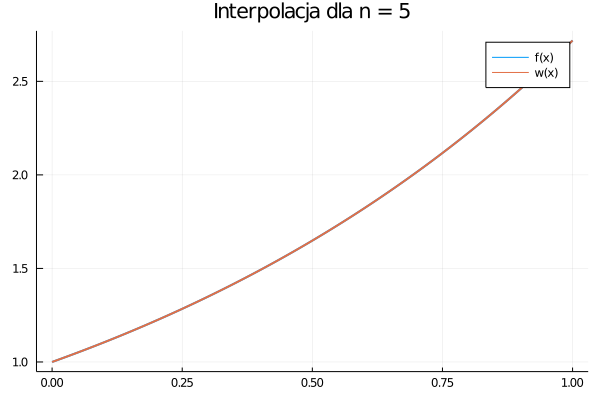

In [9]:
rysujNnfx(x->ℯ^x, 0.0, 1.0, 5)

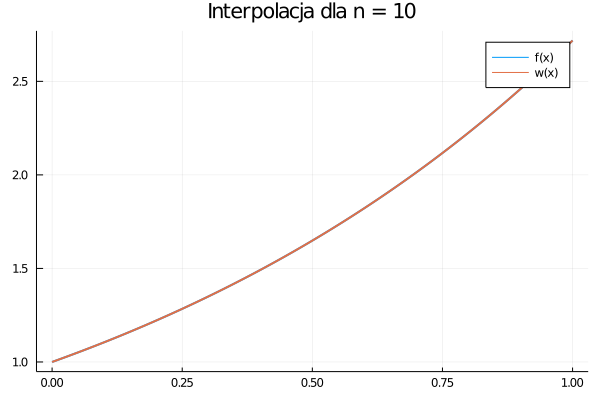

In [10]:
rysujNnfx(x->ℯ^x, 0.0, 1.0, 10)

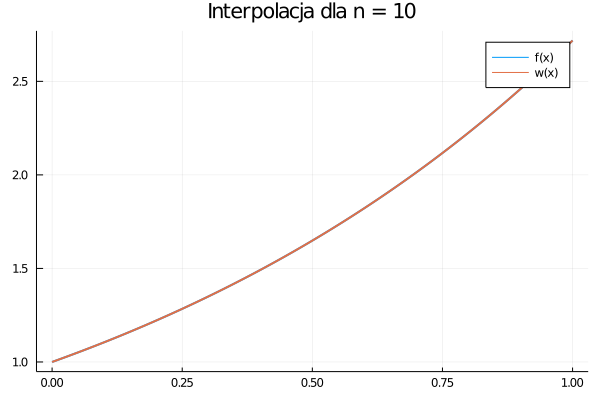

In [11]:
rysujNnfx(x->ℯ^x, 0.0, 1.0, 10)

Wykresy funkcji oraz wielomianu interpolacyjnego pokrywają się, niezależnie od stopnia wielomianu.

#### b) $x^2sinx$ dla [−1,1], n = 5, 10, 15.

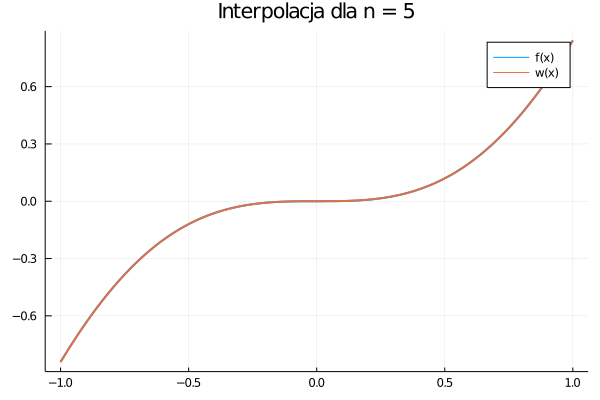

In [12]:
rysujNnfx(x->(x^2)*sin(x), -1.0, 1.0, 5)

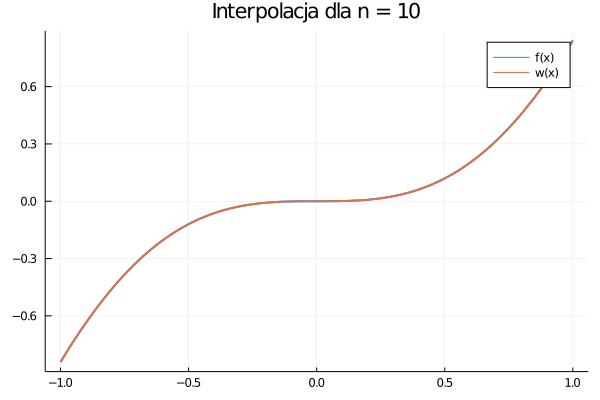

In [13]:
rysujNnfx(x->(x^2)*sin(x), -1.0, 1.0, 10)

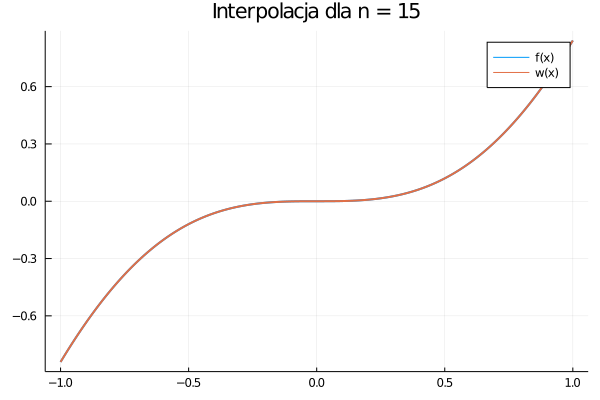

In [14]:
rysujNnfx(x->(x^2)*sin(x), -1.0, 1.0, 15)

Podobnie jak w podpunkcie a), wykresy funkcji oraz wielomianu interpolacyjnego pokrywają się, niezależnie od stopnia wielomianu.

Podane w zadaniu funkcje są dobrze odzwierciedlane za pomocą interpolacji - wartości funkcji i ich wielomianów interpolacyjnych są bardzo zbliżone. Powodem tak dobrego przybliżenia jest m.in dobrze zdefiniowane generowanie węzłów (generowanie węzłów równoodległych)

##  Zadanie 6

Przetestować funkcję $rysujNnfx(f,a,b,n)$ na następujących przykładach (zjawisko rozbieżności):

#### a) |x| dla [−1,1], n = 5, 10, 15

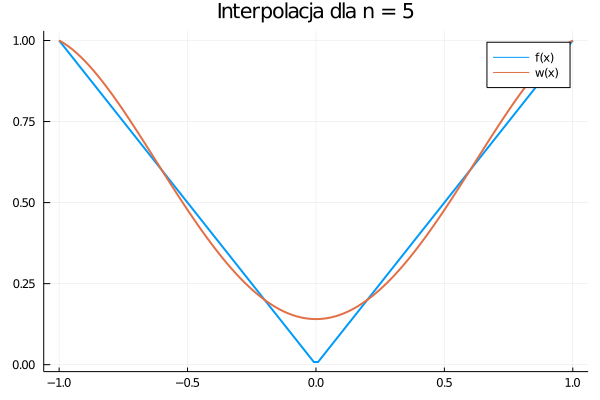

In [15]:
rysujNnfx(x->abs(x), -1.0, 1.0, 5)

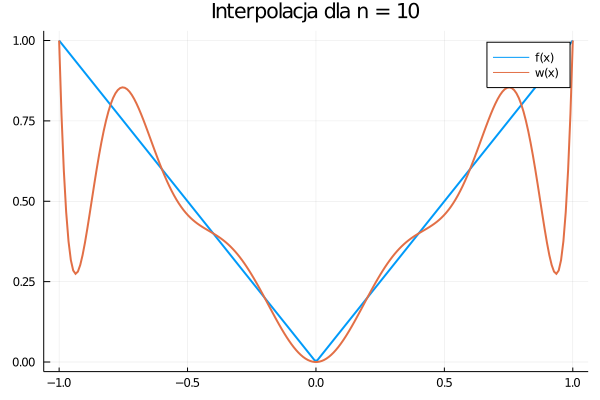

In [16]:
rysujNnfx(x->abs(x), -1.0, 1.0, 10)

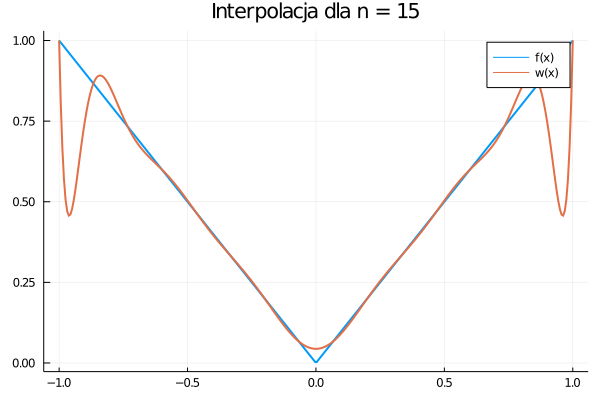

In [17]:
rysujNnfx(x->abs(x), -1.0, 1.0, 15)

W przypadku tej funkcji, wykresy nie pokrywają się dla każdego parametru n. Dla małego stopienia wielomianu interpolacyjnego przybliżenia są w miarę dokładne (jednak nadal jest widoczna rozbieżność). Im stopień wyższy tym większa jest rozbieżność między wykresami, na końcach podanego przedziału.

Funkcja |x| nie jest rózniczkowalna w całej swojej dziedzinie. To właśnie w wybranym przedziale [-1, 1] funkcja nie posiada pochodnej (dla $x_0$ = 0), dlatego przybliżenie nie jest wystarczająco dokładne i zachodzi zjawisko rozbieżności. 

#### b) $\frac{1}{1+x^2}$ [−5,5], n= 5, 10, 15 (zjawisko Runge’go)

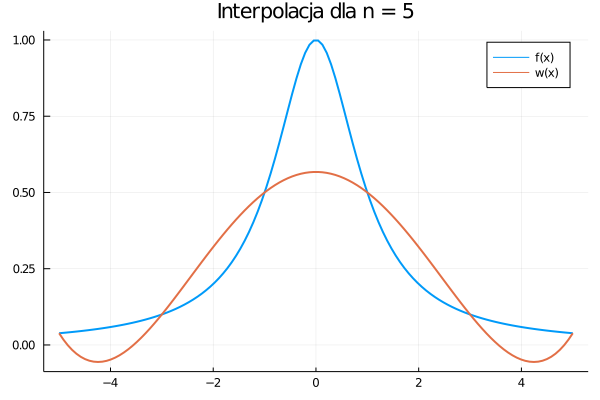

In [18]:
rysujNnfx(x->1/(1 + x^2), -5.0, 5.0, 5)

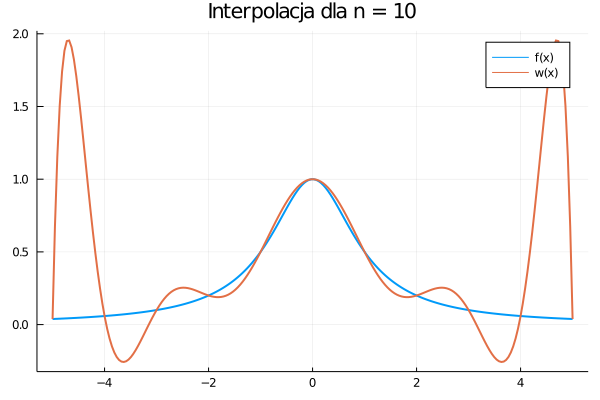

In [19]:
rysujNnfx(x->1/(1 + x^2), -5.0, 5.0, 10)

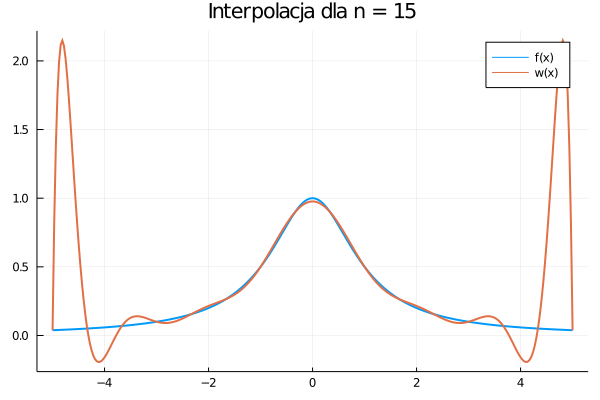

In [21]:
rysujNnfx(x->1/(1 + x^2), -5.0, 5.0, 15)

W przypadku tej funkcji, wykresy również się nie pokrywajają. Wzrost liczby węzłów pogarsza otrzymywane wyniki (powinno być przeciwnie), zwiększając rozbieżności m.in. na końcach przedziału. Obserwujemy zatem zjawisko Runge'ego, które jest typowe dla algorytmów wykorzystujących węzły równoodległe oraz wielomiany interpolacyjne wysokiego stopnia. Podobny problem pojawia się dla funkcji nieciągłych oraz odbiegających znacząco od funkcji gładkiej. Aby uniknąć tego zjawiska stosuje się interpolację z gęściej rozmieszczonymi węzłami na końcach przedziałów.